In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime
from datetime import date, timezone, timedelta
import pandas as pd
import numpy as np
import utils
import yfinance as yf
from spreads_prep import spreads_prep
from backtest import backtest
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time

# Create option data by DTE

If you want to generate spreads on specific DTE that is not included in the preload folder, please see the section below for codes. Otherwise, skip to the next section. With Core-i9 and DDR5, the average process time for generate one dataset range from 240s to 600s depending on your DTE setting. It requres around 12GB of RAM.

In [109]:
# tk = 'SPY'
# op, st = utils.prep_op_st_df(_ticker = tk)
# spread_prep = spreads_prep(op, st)

# for d in [28]:
#     calls, puts = spread_prep.get_all_spreads(_DTE = d)
#     calls.to_csv('Spreads_Data\\' + tk + '\\DTE'+ str(d)+ '_' + tk +'_calls_2010_2022.csv')
#     puts.to_csv('Spreads_Data\\' + tk + '\\DTE'+ str(d)+ '_' + tk +'_puts_2010_2022.csv')
#     # For Mac, Use: 
# #     calls.to_csv('Spreads_Data/' + tk + '/DTE'+ str(d)+ '_' + tk +'_calls_2010_2022.csv')
# #     puts.to_csv('Spreads_Data/' + tk + '/DTE'+ str(d)+ '_' + tk +'_puts_2010_2022.csv')

C:\Users\27270\Option_Spreads_Backtesting\utils.py:68: DtypeWarning: Columns (9,10,11,12,13,16,18,19,21,22,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


[*********************100%***********************]  1 of 1 completed
Start date: 2010-01-01
End date: 2022-12-31
Done Cleaning Data! CPU time: 9.33 seconds, Total time: 15.01 seconds
Done Calculating Probability! CPU time: 3.56 seconds, Total time: 6.94 seconds
Start searching for spreads from 2010-01-15 to 2022-12-30
Done Calculating All Spreads with DTE = 40! CPU time: 8.89 seconds, Total time: 15.35 seconds


# Use preloaded spread data

In [110]:
tk = 'SPY'

df_stock = utils.OHLC_info_by_range(tk,'2010-01-01','2022-12-31',interval = '1d')
st = df_stock.copy()

[*********************100%***********************]  1 of 1 completed
Start date: 2010-01-01
End date: 2022-12-31


In [251]:
# Avaliable DTE:  [1,3,5,7,14,28]
DTE = 28

calll = pd.read_csv('Spreads_Data\\SPY\\DTE' + str(DTE) + '_SPY_calls_2010_2022.csv',index_col = 0)
puttt = pd.read_csv('Spreads_Data\\SPY\\DTE' + str(DTE) + '_SPY_puts_2010_2022.csv',index_col = 0)
calll.shape, puttt.shape

((583162, 19), (1507206, 19))

In [115]:
# query_year = pd.DatetimeIndex(calll['QUOTE_TIME_EST']).year == 2018
# year_df = calll.loc[query_year]
# avaliable_dates = year_df.QUOTE_TIME_EST.unique()
# print(avaliable_dates.shape)
# for i in range(10):
#     print(avaliable_dates[i])

# query_date = ((pd.DatetimeIndex(year_df['QUOTE_TIME_EST']).month == 1) 
#               & (pd.DatetimeIndex(year_df['QUOTE_TIME_EST']).day == 31))
# query_df = year_df.loc[query_date]
# query_df.sort_values(by = 'MAX_LOSS', ascending = True).head(10)

# query_df.loc[140692]

In [243]:
backtest_class = backtest(_spread_data = (calll, puttt), _stock_data = st)

## Define parameters

In [244]:
# Change the following parameters to create a filtering strategy.
def define_parm():
    min_EXPECTED_EARN = 0
    min_EARN_RATIO = 0
    
    min_SELL_OTM_PROB = 0.7
    min_BUY_OTM_PROB = 0.75
    
    min_width = 5
    max_width = 10
    
    max_trades_per_day = 1
    
    min_PREMIUM = None
    max_percentage_to_strike_ratio = 0.05
    
    skip_date = ['2018-2-9']
    
    parm = (min_EXPECTED_EARN,min_EARN_RATIO,min_SELL_OTM_PROB,min_BUY_OTM_PROB,
            min_width,max_width,max_trades_per_day,min_PREMIUM,max_percentage_to_strike_ratio,skip_date)
    
    return parm

## Results with only the parameters

Done backtesting from 2011-01-04 00:00:00 to 2022-12-27 00:00:00!
Call: 66 trades, win rate: 1.0 profits: 1.44
Put: 632 trades, win rate: 0.9778 profits: 20.6
Total 698 trades, win rate: 0.9799 profit: 22.04


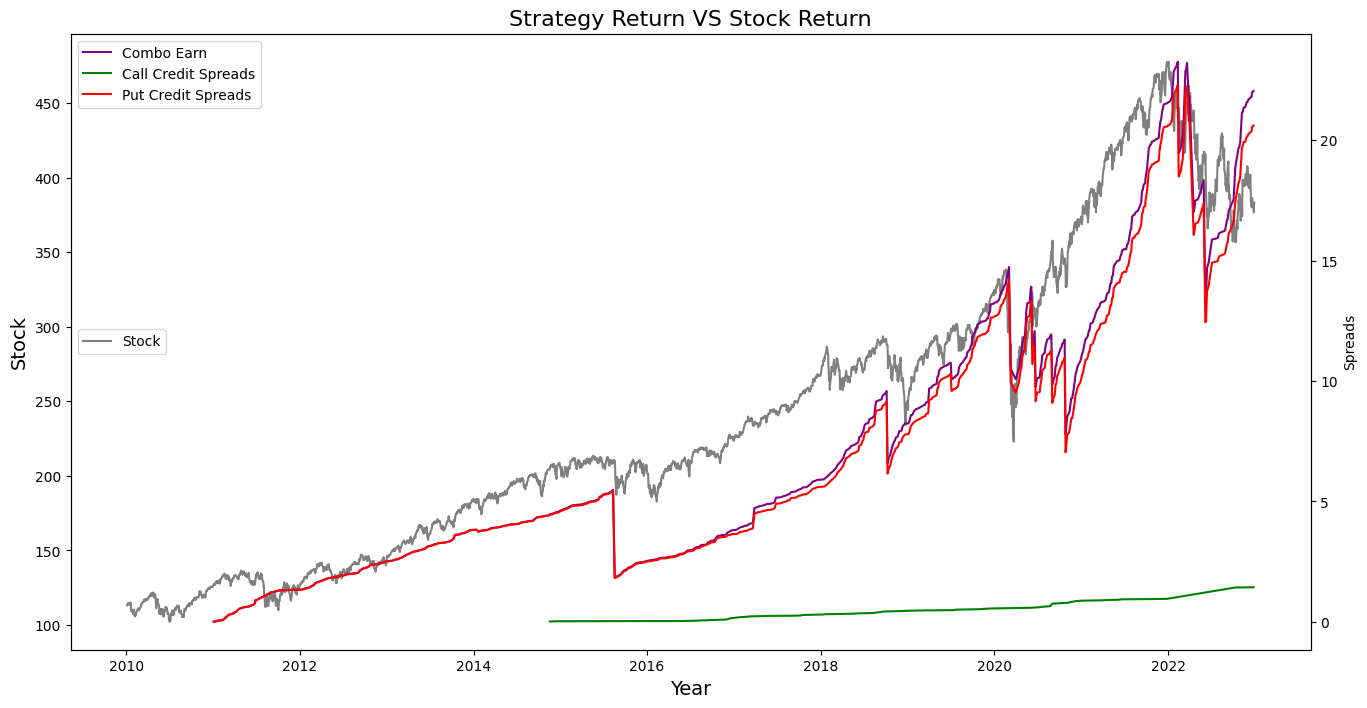

In [245]:
# Set Parameter Above
backtest_class_just_parms = backtest(_spread_data = (calll, puttt), _stock_data = st)
backtest_class_just_parms.set_parm(define_parm(), start_date = None, end_date = None)
backtest_class_just_parms.go()
backtest_class_just_parms.win_rate()

# Print the return graph
backtest_class_just_parms.draw_result(_st = st, _show = 'ALL')
# backtest_class.report('BOTH')

In [190]:
put_loss = backtest_class_just_parms.put_satisfied
put_loss = put_loss.loc[put_loss.WIN == False]

In [194]:
put_win = backtest_class_just_parms.put_satisfied
put_win = put_loss.loc[put_win.WIN == True]

In [195]:
put_ = backtest_class_just_parms.put_satisfied

In [200]:
put_.loc[put_.QUOTE_TIME_EST.dt.year == 2020].head(50)

QUOTE_TIME_EST  SELL_PRICE  BUY_PRICE   DTE  isCALL  SELL_STRIKE  \
961771      2020-01-03        0.44       0.19  14.0       0        307.0   
962611      2020-01-07        0.27       0.13  14.0       0        307.0   
963076      2020-01-08        0.37       0.20  14.0       0        309.0   
967148      2020-01-10        0.40       0.13  14.0       0        313.5   
968614      2020-01-13        0.28       0.11  14.0       0        315.0   
969229      2020-01-15        0.27       0.10  14.0       0        314.0   
974323      2020-01-17        0.22       0.12  14.0       0        316.5   
975776      2020-01-22        0.40       0.20  14.0       0        317.0   
976883      2020-01-24        0.70       0.38  14.0       0        314.0   
978092      2020-01-29        0.91       0.56  14.0       0        312.0   
980192      2020-02-04        0.49       0.26  14.0       0        313.0   
981139      2020-02-05        0.41       0.19  14.0       0        317.0   
989330      2020-02-07        0.92       0.48  14.0       0        322.0   
990350      2020-02-10        0.43       0.18  14.0       0        319.0   
991692      2020-02-12        0.37       0.19  14.0       0        323.0   
993446      2020-02-14        0.37       0.16  14.0       0        323.0   
994802      2020-02-19        0.40       0.20  14.0       0        322.0   
996268      2020-02-21        1.15       0.44  14.0       0        321.0   
1048112     2020-04-24        3.30       2.26  14.0       0        272.0   
1053893     2020-05-01        3.50       2.50  14.0       0        269.0   
1059701     2020-05-08        2.56       1.65  14.0       0        283.0   
1061368     2020-05-12        3.06       2.08  14.0       0        277.0   
1063605     2020-05-15        2.61       1.26  14.0       0        274.0   
1069106     2020-05-22        1.79       1.01  14.0       0        282.0   
1073121     2020-05-29        2.25       1.34  14.0       0        293.0   
1089544     2020-06-05        1.63       0.92  14.0       0        306.0   
1103710     2020-06-26        3.09       1.83  14.0       0        286.0   
1111879     2020-07-10        2.26       1.57  14.0       0        307.0   
1117573     2020-07-17        1.87       1.03  14.0       0        309.0   
1122106     2020-07-22        1.29       0.83  14.0       0        311.0   
1123591     2020-07-24        1.50       0.94  14.0       0        305.0   
1127684     2020-07-31        2.04       0.86  14.0       0        317.0   
1129740     2020-08-03        1.25       0.78  14.0       0        314.0   
1132144     2020-08-05        1.69       0.97  14.0       0        322.0   
1133004     2020-08-07        1.53       0.97  14.0       0        323.0   
1134727     2020-08-10        1.02       0.50  14.0       0        320.0   
1137097     2020-08-12        1.28       0.72  14.0       0        324.0   
1138810     2020-08-14        2.44       1.61  14.0       0        331.0   
1140102     2020-08-17        1.16       0.51  14.0       0        325.0   
1142398     2020-08-19        1.18       0.79  14.0       0        322.0   
1145155     2020-08-21        1.43       0.75  14.0       0        327.0   
1146513     2020-08-25        0.85       0.48  14.0       0        328.0   
1150783     2020-08-28        0.83       0.57  14.0       0        334.0   
1152882     2020-08-31        1.03       0.73  14.0       0        332.0   
1170281     2020-09-04        3.10       2.31  14.0       0        328.0   
1173094     2020-09-11        2.38       1.64  14.0       0        320.0   
1176111     2020-09-18        1.57       0.84  14.0       0        315.0   
1179658     2020-09-25        2.43       1.09  14.0       0        318.0   
1181323     2020-09-30        1.66       0.80  14.0       0        319.0   
1187295     2020-10-02        1.81       1.26  14.0       0        318.0   

         BUY_STRIKE  PREMIUM  MAX_LOSS  SELL_ATM_IV  ...     EMA_DTE  TREND  \
961771        298.0     0.25      8.75      0.09477 

## Results with both indicators and parameters

Done backtesting from 2011-03-18 00:00:00 to 2022-12-02 00:00:00!
Call: 3 trades, win rate: 0.6667 profits: -3.65
Put: 32 trades, win rate: 0.9375 profits: 9.15
Total 35 trades, win rate: 0.9143 profit: 5.5


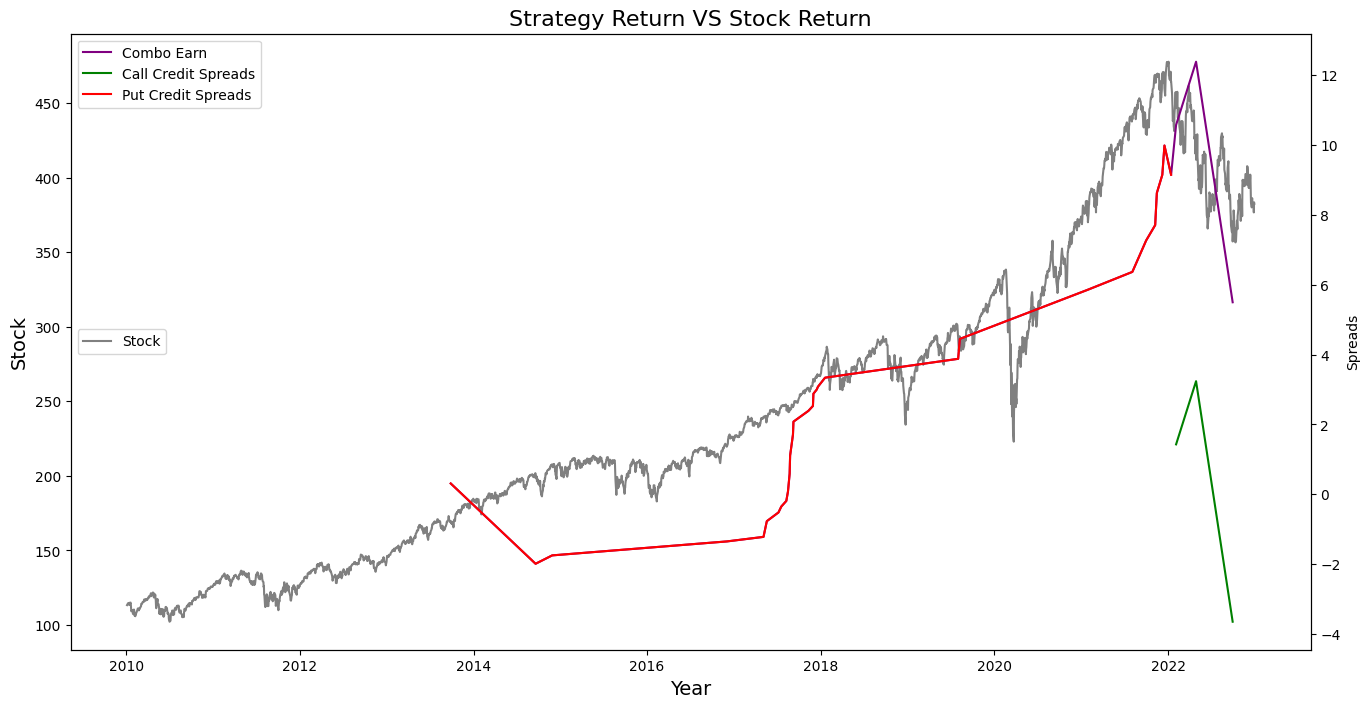

In [252]:
backtest_class_with_TA = backtest(_spread_data = (calll, puttt), _stock_data = st)
backtest_class_with_TA.set_parm(define_parm(),start_date = None, end_date = None)
backtest_class_with_TA.technical_indicator_search(_min_iv_ratio = 0.8, opion_type = 'BOTH', )
backtest_class_with_TA.win_rate()
# Print the return graph
backtest_class_with_TA.draw_result(_st = st, _show = 'ALL')
# backtest_class.report('BOTH')

In [120]:
class_st.columns

Index(['index', 'DATE', 'Open', 'High', 'Low', 'CLOSE', 'Adj Close', 'Volume',
       'HIST_VOLATILITY', 'RSI', 'EMA_7', 'EMA_50', 'EMA_252', 'EMA_DTE',
       'TREND', 'TREND_REVERSAL'],
      dtype='object')

In [175]:
loss_put = backtest_class_with_TA.put_satisfied[backtest_class_with_TA.put_satisfied['WIN'] == False]
loss_put = loss_put.sort_values(by='ACTUAL_EARN')
loss_put.reset_index(inplace = True,drop = True)
loss_put.groupby('EXPIRE_TIME').agg({'ACTUAL_EARN':'sum'})

ACTUAL_EARN
EXPIRE_TIME             
2014-01-24     -0.310002
2014-12-12     -0.700002
2015-08-21    -41.209984
2017-08-18     -0.149993
2017-12-22      0.000000
2018-10-12    -19.609927
2019-08-05     -0.219985

In [206]:
backtest_class_with_TA.report('P'), backtest_class_just_parms.report('P')


Credit Put:

Number of Positions: 151
Win Rate: 0.9801
Total Return: 9.73
Max Collateral: 10.0
Max Drawdown: 0.12 Date: 2011-03-24 00:00:00
Max Individual Loss: -5.4 id: 1760365
Max Individual Gain: 0.69 id: 1454389
Average Collateral: 6.99
Average Gain: 0.06
Average Expectation: 0.99

Credit Put:

Number of Positions: 738
Win Rate: 0.9621
Total Return: 19.82
Max Collateral: 10.0
Max Drawdown: 0.03 Date: 2011-01-14 00:00:00
Max Individual Loss: -7.98 id: 2019254
Max Individual Gain: 1.41 id: 1452292
Average Collateral: 7.22
Average Gain: 0.03
Average Expectation: 0.98


(None, None)

## Result with only the technical indicators

In [116]:
# backtest_class.set_parm(start_date = None, end_date = None)
# backtest_class.technical_indicator_search(_min_iv_ratio = 1, opion_type = 'BOTH', )
# backtest_class.win_rate()
# # Print the return graph
# backtest_class.draw_result(_st = st, _show = 'ALL')
# # backtest_class.report('BOTH')

## To acess trades data and report

In [136]:
# To Acess Stastiscal Report on strategy 'C'/'P'/'BOTH'/'COMBO'
backtest_class_just_parms.report('BOTH')

Credit Call:

Number of Positions: 7351
Win Rate: 0.8568
Total Return: -95.75
Max Collateral: 10.0
Max Drawdown: -263.4 Date: 2022-08-01 00:00:00
Max Individual Loss: -9.29 id: 617558
Max Individual Gain: 2.05 id: 669719
Average Collateral: 4.87
Average Gain: -0.01
Average Expectation: 0.89

Credit Put:

Number of Positions: 9088
Win Rate: 0.901
Total Return: 187.26
Max Collateral: 10.0
Max Drawdown: 0.28 Date: 2011-01-07 00:00:00
Max Individual Loss: -9.8 id: 991601
Max Individual Gain: 2.51 id: 1061400
Average Collateral: 5.34
Average Gain: 0.02
Average Expectation: 0.91


In [219]:
# To Acess the Trades df
print('Number of Calls:',backtest_class_just_parms.call_satisfied.shape, 'Number of Puts:',backtest_class_just_parms.put_satisfied.shape)
print(backtest_class_just_parms.call_satisfied.columns)
# Retrieve trade data from class.call_satisfied and class.put_satisfied
backtest_class.call_satisfied.head()

Number of Calls: (115, 34) Number of Puts: (738, 34)
Index(['QUOTE_TIME_EST', 'SELL_PRICE', 'BUY_PRICE', 'DTE', 'isCALL',
       'SELL_STRIKE', 'BUY_STRIKE', 'PREMIUM', 'MAX_LOSS', 'SELL_ATM_IV',
       'BUY_ATM_IV', 'SELL_IV', 'BUY_IV', 'EXPECTED_EARN',
       'EXPECTED_EARN_RATIO', 'BUY_OTM_PROB', 'SELL_OTM_PROB', 'CURRENT_PRICE',
       'PRICE@EXPIRE', 'HIST_VOLATILITY', 'RSI', 'EMA_252', 'EMA_50', 'EMA_7',
       'EMA_DTE', 'TREND', 'TREND_REVERSAL', 'STRIKE_DISTANCE',
       'STRIKE_DISTANCE_RATIO', 'WIDTH', 'EXPIRE_TIME', 'ACTUAL_EARN',
       'CUM_EARN', 'WIN'],
      dtype='object')


Empty DataFrame
Columns: []
Index: []

## Some interesting plots

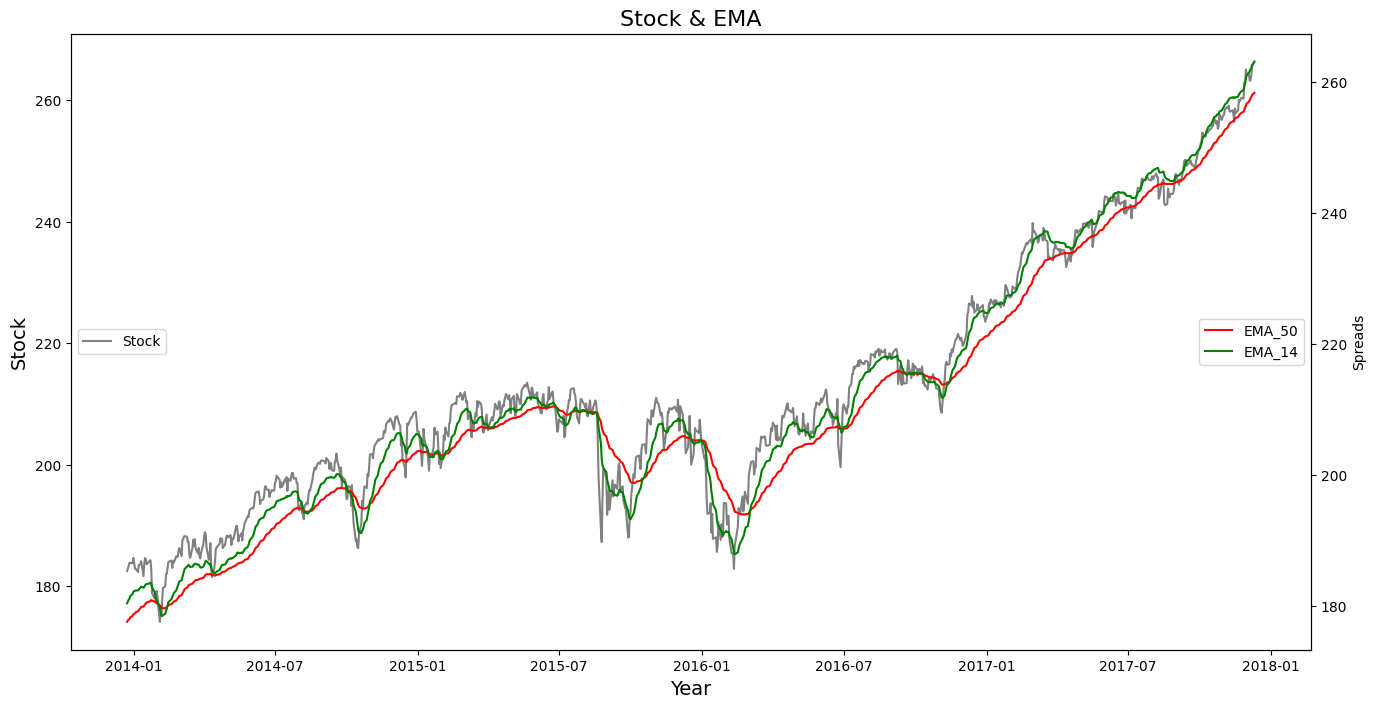

In [127]:
class_st = backtest_class_with_TA.stock_data
class_st = class_st[1000:2000]
fig,ax1 = plt.subplots()

fig.set_size_inches(16, 8, forward=True)
# make a plot
ax1.plot(class_st.DATE, class_st.CLOSE,color="grey")
# set x-axis label
ax1.set_xlabel("Year", fontsize = 14)
# set y-axis label
ax1.set_ylabel("Stock",
              color="black",
              fontsize=14)


# make a plot with different y-axis using second axis object
ax2 = ax1.twinx()
ax2.plot(class_st.dropna().DATE, class_st.dropna().EMA_50,color="red")
ax2.plot(class_st.dropna().DATE, class_st.dropna().EMA_DTE,color="green")
ax2.set_ylabel("Spreads",color="black")
plt.title("Stock & EMA",fontsize=16)
ax1.legend(['Stock'],loc='center left')
ax2.legend(['EMA_50', 'EMA_14'],loc='center right')

plt.show()

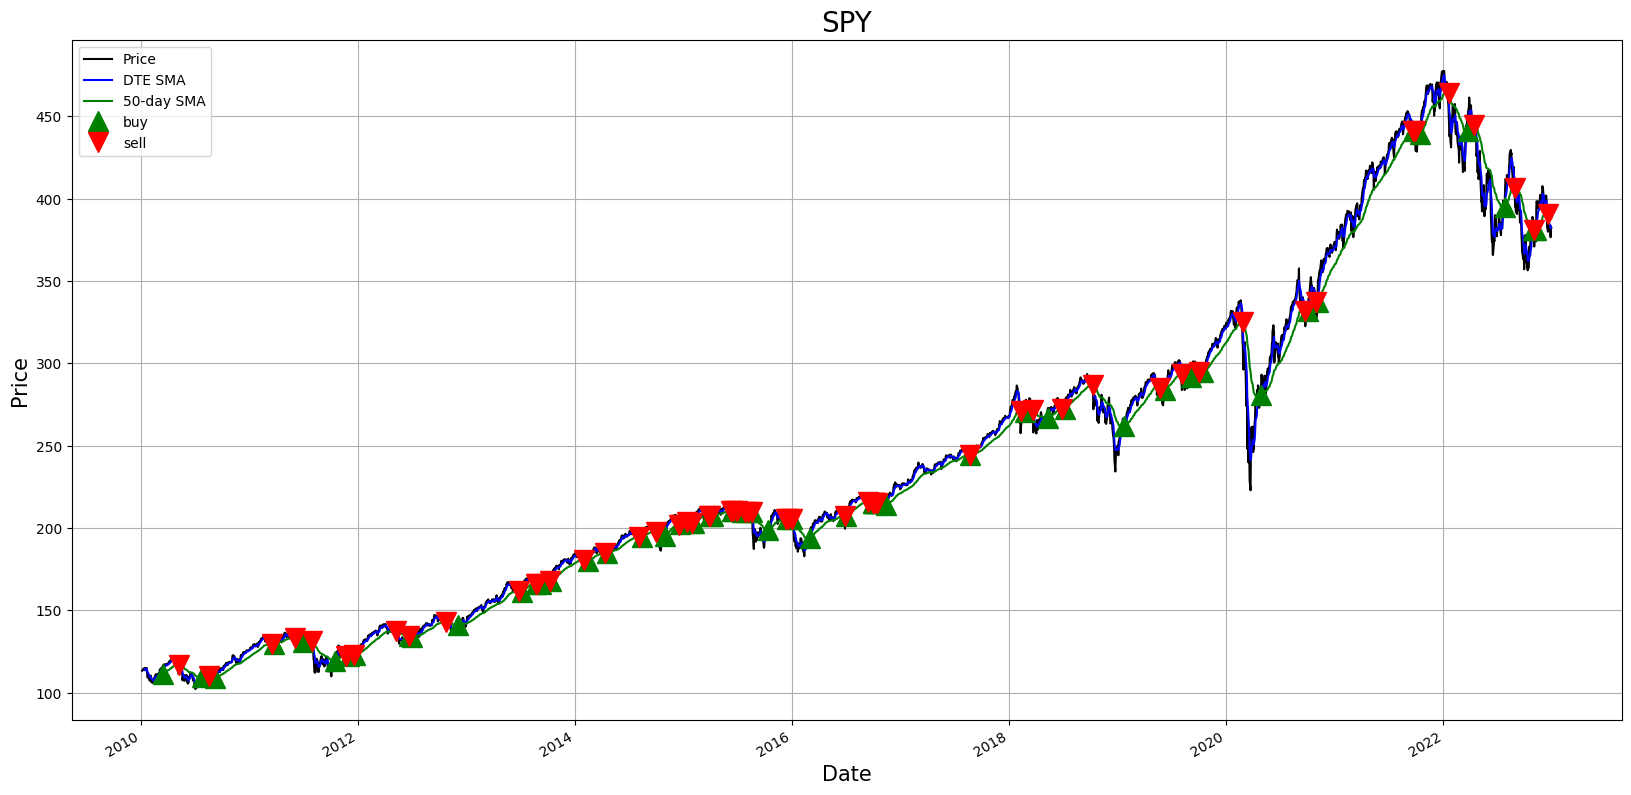

In [379]:
# Crossover plot

df_ = backtest_class.stock_data

df_.index = df_.DATE
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df_['CLOSE'].plot(color = 'k', label= 'Price') 
df_['EMA_DTE'].plot(color = 'b',label = 'DTE SMA') 
df_['EMA_50'].plot(color = 'g', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(df_[df_['TREND_REVERSAL'] == 1].index, 
         df_['EMA_50'][df_['TREND_REVERSAL'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(df_[df_['TREND_REVERSAL'] == -1].index, 
         df_['EMA_50'][df_['TREND_REVERSAL'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('SPY', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

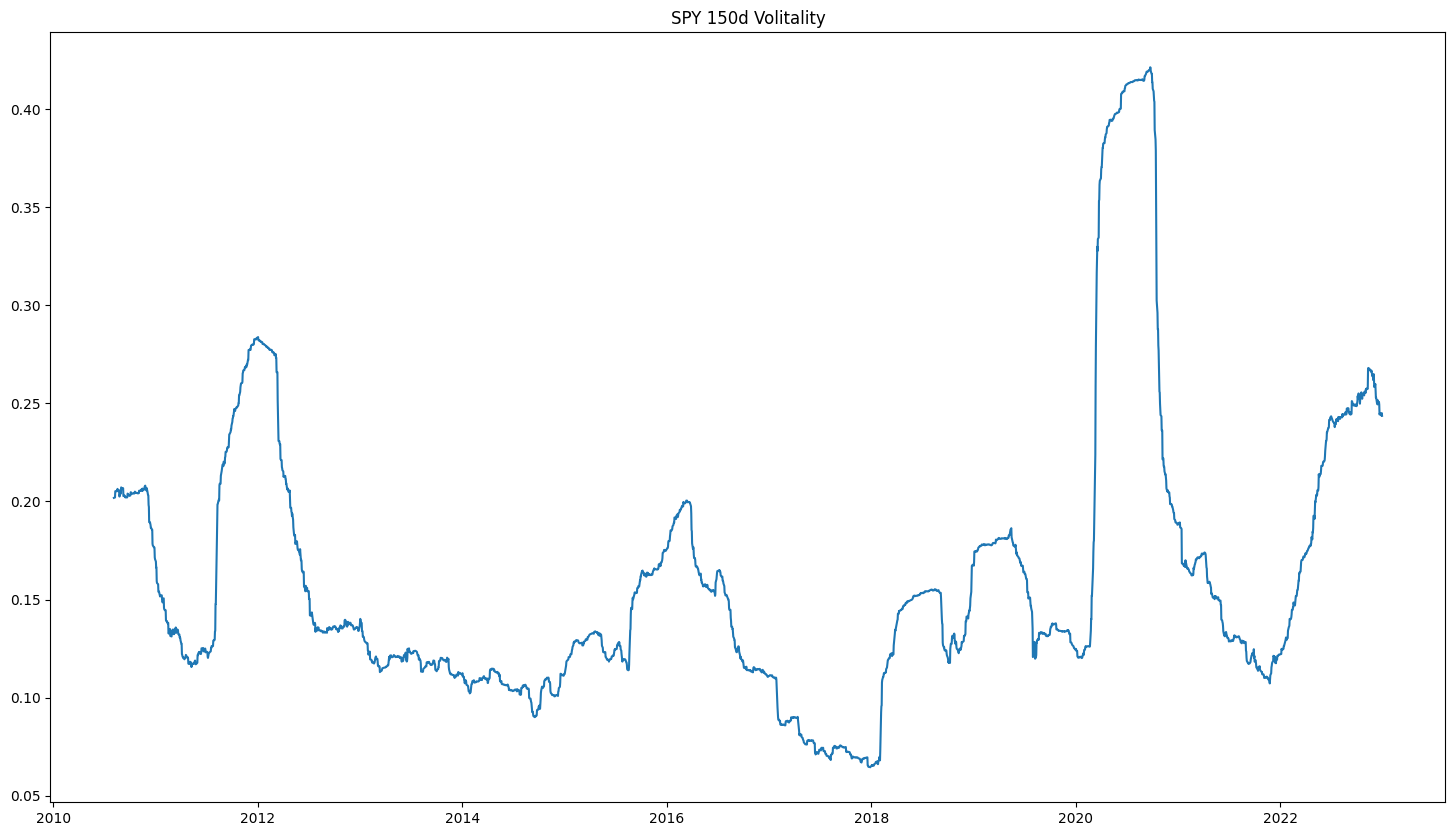

In [208]:
plt.figure(figsize = (18,10))
plt.title('SPY 150d Volitality')
plt.plot(backtest_class_with_TA.stock_data.DATE, backtest_class_with_TA.stock_data.HIST_VOLATILITY)

In [258]:
call_ = backtest_class_with_TA.call_spreads
putt_ = backtest_class_with_TA.put_spreads
putt_ = putt_.groupby('QUOTE_TIME_EST').head(1)

In [259]:
putt_

QUOTE_TIME_EST  SELL_PRICE  BUY_PRICE   DTE  isCALL  SELL_STRIKE  \
15120       2011-03-18        0.00       0.03  28.0       0         66.0   
17073       2011-05-20        0.01       0.02  28.0       0         95.0   
17853       2011-06-02        0.00       0.01  28.0       0         80.0   
18594       2011-06-17        0.00       0.02  28.0       0         71.0   
20247       2011-07-22        0.00       0.01  28.0       0         81.0   
...                ...         ...        ...   ...     ...          ...   
1485483     2022-11-14        0.09       0.09  28.0       0        305.0   
1486914     2022-11-16        0.23       0.21  28.0       0        320.0   
1488090     2022-11-18        0.00       0.01  28.0       0        100.0   
1495965     2022-11-25        0.04       0.05  28.0       0        280.0   
1499205     2022-12-02        0.00       0.01  28.0       0        160.0   

         BUY_STRIKE  PREMIUM  MAX_LOSS  SELL_ATM_IV  ...  CURRENT_PRICE  \
15120          65.0    -0.03      1.03      0.20370  ...     127.760002   
17073          94.0    -0.01      1.01      0.11001  ...     133.610001   
17853          75.0    -0.01      5.01      0.15586  ...     131.729996   
18594          70.0    -0.02      1.02      0.19940  ...     127.050003   
20247          80.0    -0.01      1.01      0.13692  ...     134.580002   
...             ...      ...       ...          ...  ...            ...   
1485483       300.0     0.00      5.00      0.18945  ...     395.119995   
1486914       315.0     0.02      4.98      0.18732  ...     395.450012   
1488090        95.0    -0.01      5.01      0.10974  ...     396.029999   
1495965       275.0    -0.01      5.01      0.08190  ...     402.329987   
1499205       150.0    -0.01     10.01      0.05891  ...     406.910004   

         PRICE@EXPIRE  HIST_VOLATILITY        RSI     EMA_252      EMA_50  \
15120      132.039993         0.133499  46.911117  119.764715  129.567332   
17073      127.050003         0.117906  51.952388  123.761273  133.034254   
17853      131.970001         0.121587  47.591961  124.309867  132.939177   
18594      131.690002         0.124988  40.850013  124.648730  131.279794   
20247      112.639999         0.126095  55.701350  125.848668  131.659594   
...               ...              ...        ...         ...         ...   
1485483    398.950012         0.267356  54.209284  404.333752  382.135720   
1486914    399.399994         0.267284  54.101027  404.217695  383.274042   
1488090    383.269989         0.266942  54.236680  404.074718  384.187449   
1495965    382.910004         0.263817  56.252959  403.942253  386.516489   
1499205    382.429993         0.258313  57.176104  403.892993  389.485413   

              EMA_7     EMA_DTE  TREND  TREND_REVERSAL  
15120    128.700214  130.363640    1.0             0.0  
17073    134.092134  133.867083    1.0             0.0  
17853    132.786658  133.355458    1.0             0.0  
18594    127.941289  130.546954    0.0             0.0  
20247    133.157003  131.878473    1.0             0.0  
...             ...         ...    ...             ...  
1485483  388.438857  380.736791    0.0             0.0  
1486914  392.076234  382.891416    0.0             0.0  
1488090  393.470379  384.526209    1.0             1.0  
1495965  398.385587  388.382197    1.0             0.0  
1499205  402.981533  392.804681    1.0             0.0  

[914 rows x 27 columns]

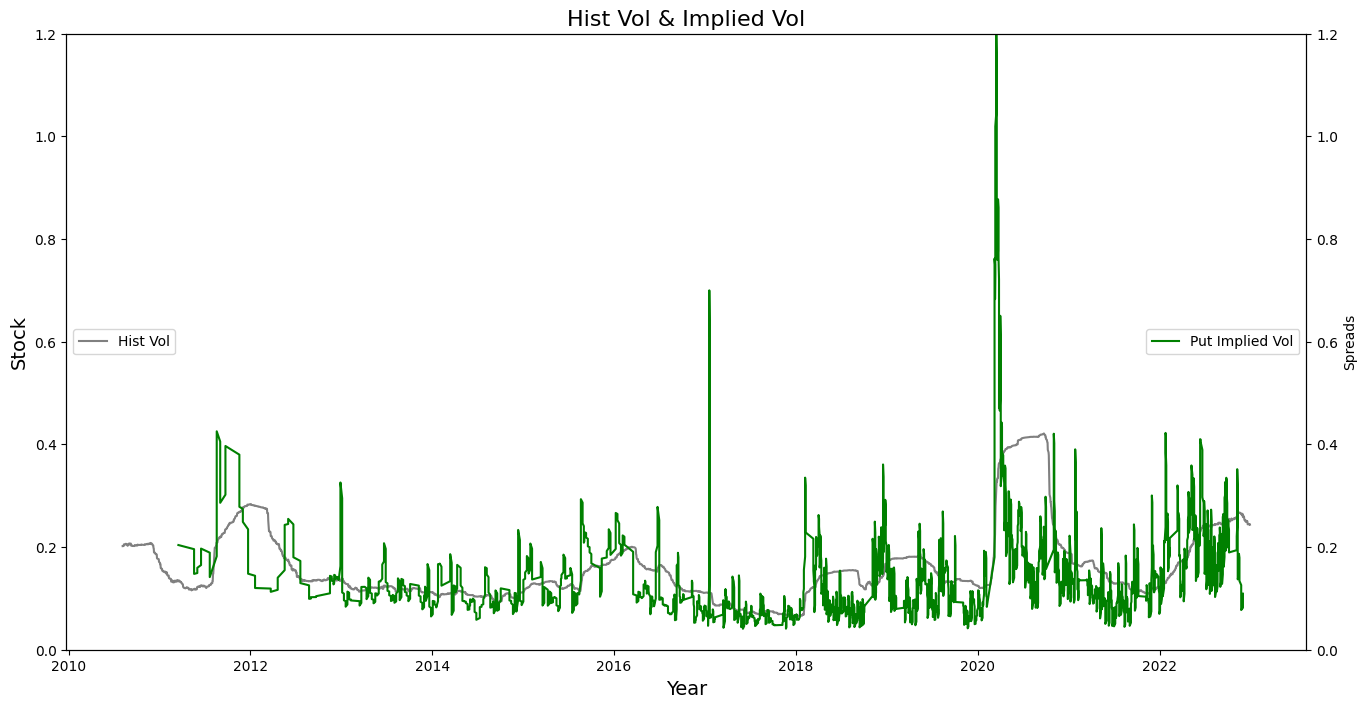

In [262]:
class_st = backtest_class_with_TA.stock_data
fig,ax1 = plt.subplots()

fig.set_size_inches(16, 8, forward=True)
# make a plot
ax1.plot(class_st.DATE, class_st.HIST_VOLATILITY,color="grey")
# set x-axis label
ax1.set_xlabel("Year", fontsize = 14)
# set y-axis label
ax1.set_ylabel("Stock",
              color="black",
              fontsize=14)
# ax1.set_yticks([0.05* i for i in range(10)])

# make a plot with different y-axis using second axis object
ax2 = ax1.twinx()

piv_avg7 = putt_.SELL_ATM_IV.rolling(7).mean() 
civ_avg7 =  call_.SELL_ATM_IV.rolling(7).mean() 

# ax2.plot(putt_.QUOTE_TIME_EST,piv_avg7,color="red")
ax2.plot(call_.QUOTE_TIME_EST, civ_avg7,color="green")


ax2.set_ylabel("Spreads",color="black")
plt.title("Hist Vol & Implied Vol",fontsize=16)
ax1.legend(['Hist Vol'],loc='center left')
ax2.legend(['Put Implied Vol', 'Call Implied Vol'],loc='center right')

a,b = 0,1.2
ax1.set_ylim(a,b)
ax2.set_ylim(a,b)

plt.show()

In [233]:
putt_.SELL_ATM_IV.rolling(14).mean() 

13968          NaN
13969          NaN
13976          NaN
13970          NaN
13977          NaN
            ...   
2128747    0.09508
2128751    0.09508
2128754    0.09508
2128756    0.09508
2128757    0.09508
Name: SELL_ATM_IV, Length: 2114790, dtype: float64